In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.dates import DateFormatter

In [38]:
# Update rcParams to set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [2]:
hours = 8
t_max = hours*60*60

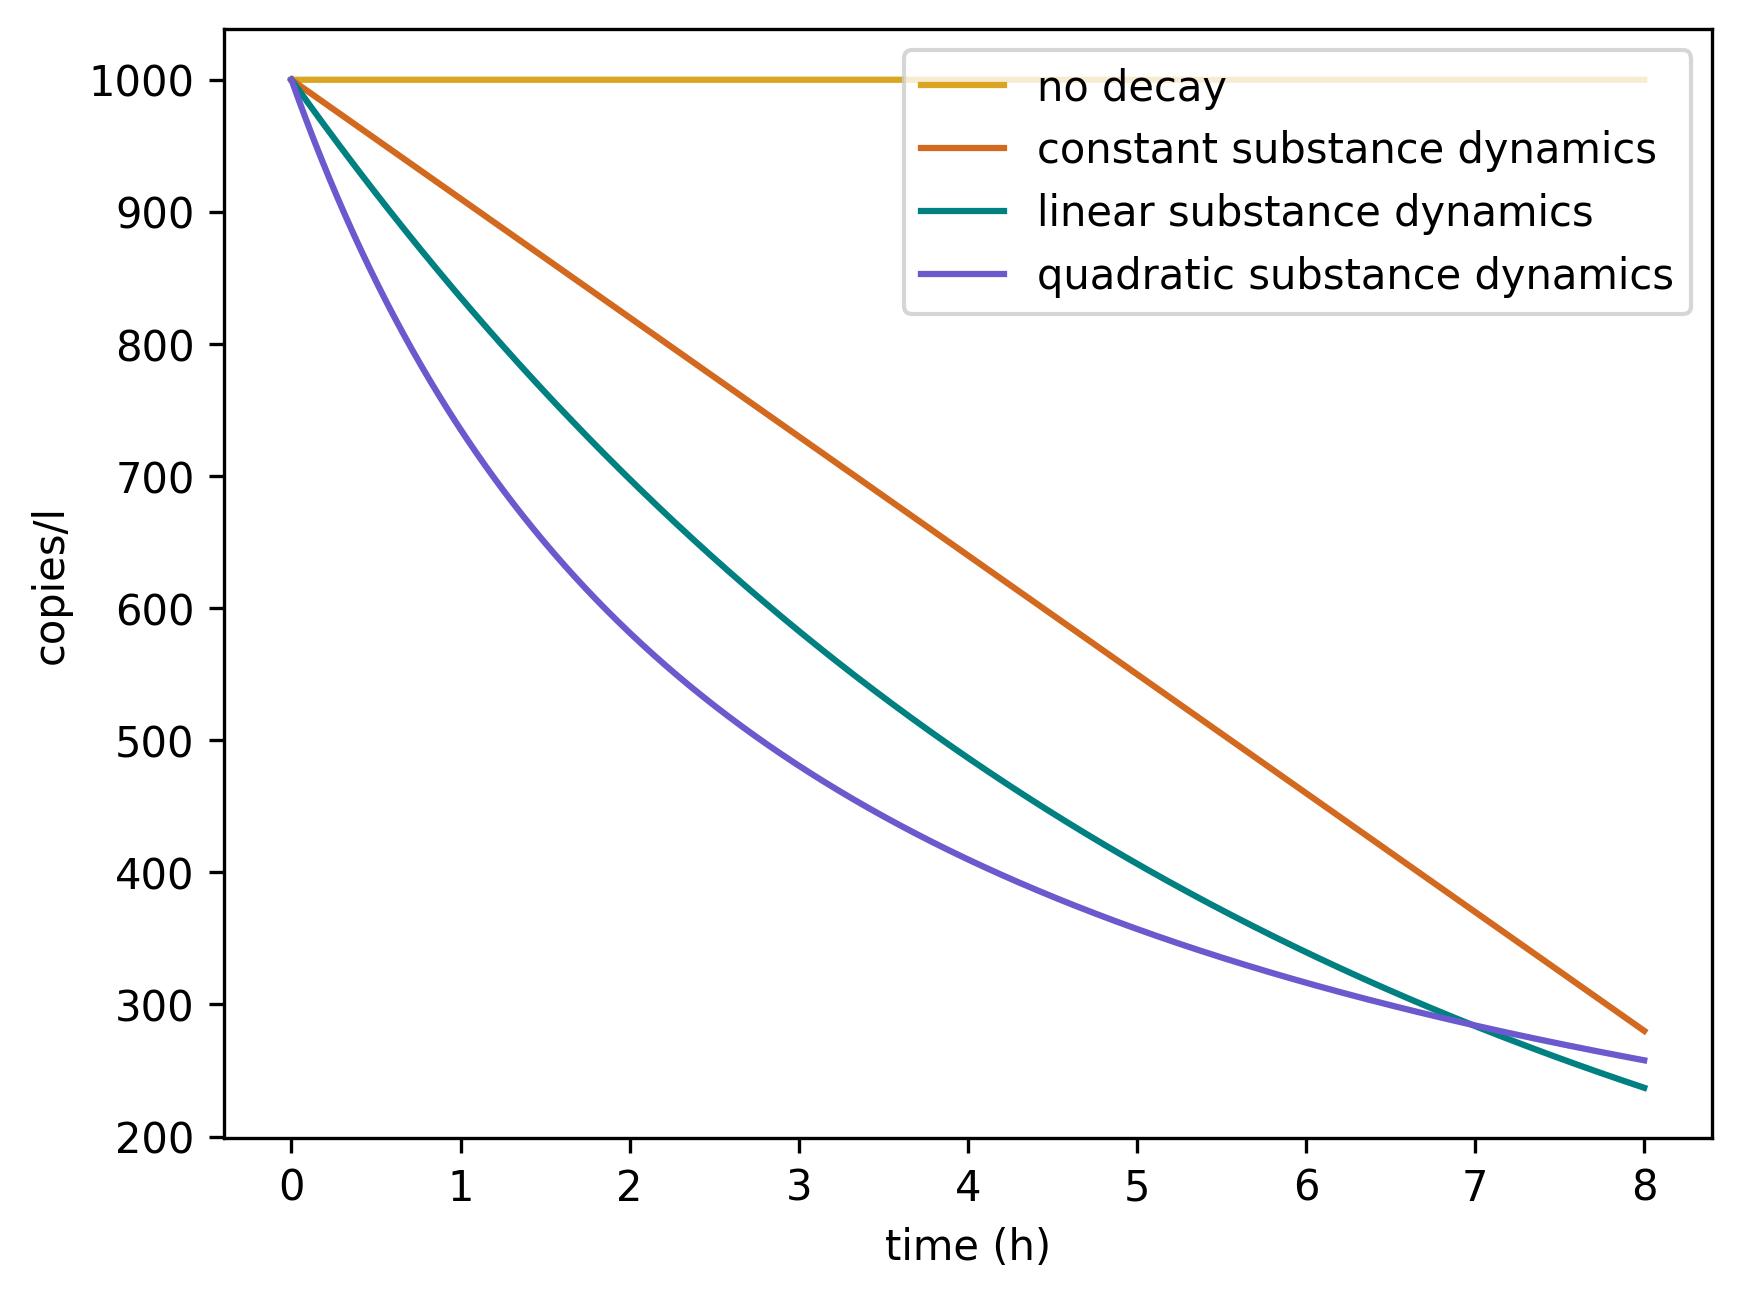

In [3]:
hours = 8
t_max = hours*60*60

start_value = 1000
t_vals = np.arange(0, t_max, 1)

no_decay = [start_value for t in t_vals]
constant_decay = [start_value - 2.5*10**(-2)*t for t in t_vals]
linear_decay = [start_value*np.exp(-5*10**(-5)*t) for t in t_vals]
quadratic_decay = [1/(10**(-7)*t+1/start_value) for t in t_vals]

t_vals = [t/60/60 for t in t_vals]

c = ["goldenrod", "chocolate", "teal", "slateblue"]
plt.figure(dpi=300)
plt.plot(t_vals,no_decay, label='no decay', color=c[0])
plt.plot(t_vals,constant_decay, label='constant substance dynamics', color=c[1])
plt.plot(t_vals,linear_decay, label='linear substance dynamics', color=c[2])
plt.plot(t_vals,quadratic_decay, label='quadratic substance dynamics', color=c[3])
plt.xlabel('time (h)')
plt.ylabel('copies/l')
plt.legend(loc='upper right')
#plt.show()
# plt.savefig(os.path.join("systems_output", "plots", "station_concentration", "reaktionstests", 'overview_decay_dynamics.png'))

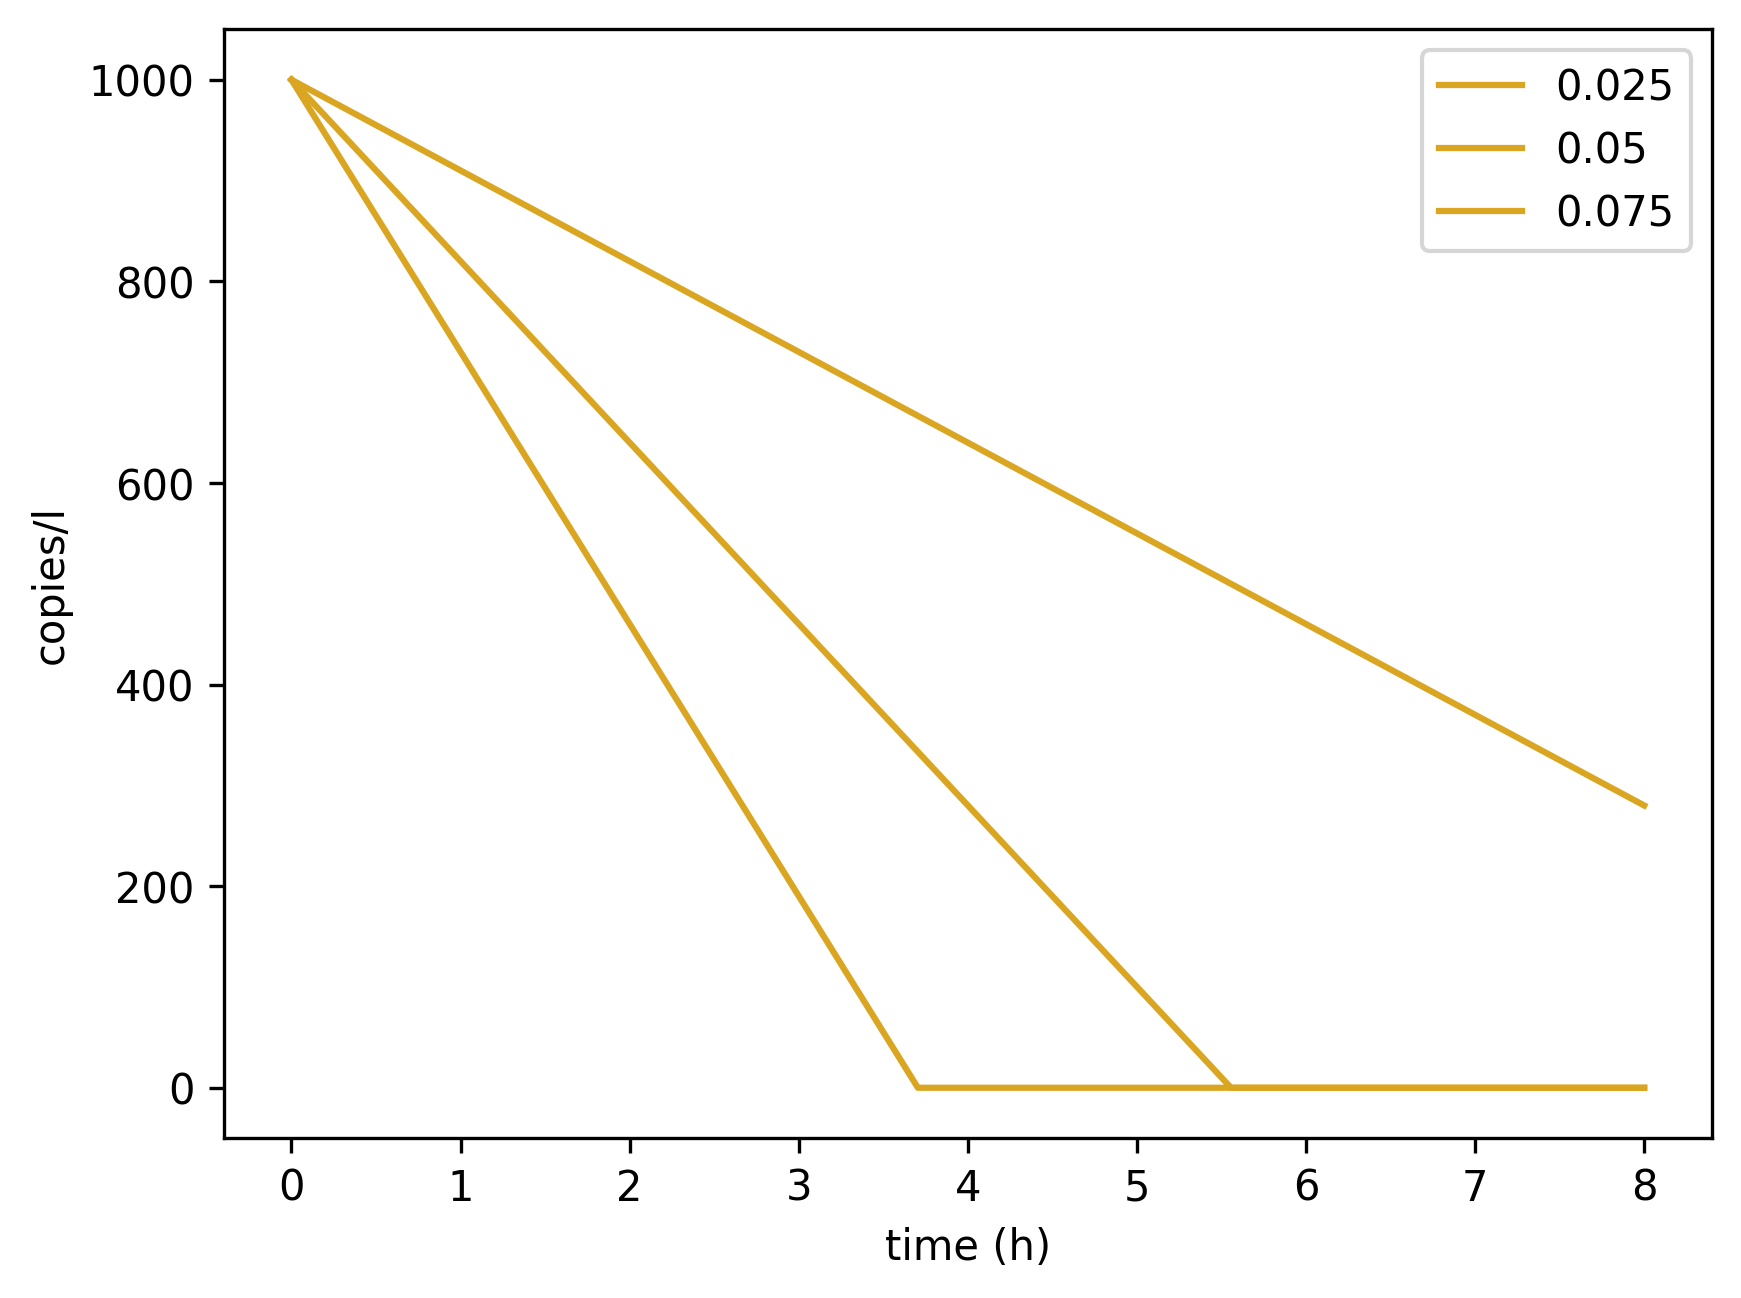

In [18]:
hours = 8
t_max = hours*60*60

start_value = 1000
t_vals = np.arange(0, t_max, 1)

pars = [2.5*10**(-2), 5*10**(-2), 7.5*10**(-2)]
decays = [[max(0, start_value - par*t) for t in t_vals] for par in pars]

t_vals = [t/60/60 for t in t_vals]

c = ["goldenrod", "chocolate", "teal", "slateblue"]
plt.figure(dpi=300)
for i, decay in enumerate(decays):
    plt.plot(t_vals,decay, label=f'{pars[i]}', color=c[0])
#plt.plot(t_vals,constant_decay, label='constant substance dynamics', color=c[1])
#plt.plot(t_vals,linear_decay, label='linear substance dynamics', color=c[2])
#plt.plot(t_vals,quadratic_decay, label='quadratic substance dynamics', color=c[3])
plt.xlabel('time (h)')
plt.ylabel('copies/l')
plt.legend(loc='upper right')
#plt.show()
# plt.savefig(os.path.join("systems_output", "plots", "station_concentration", "reaktionstests", 'overview_decay_dynamics.png'))

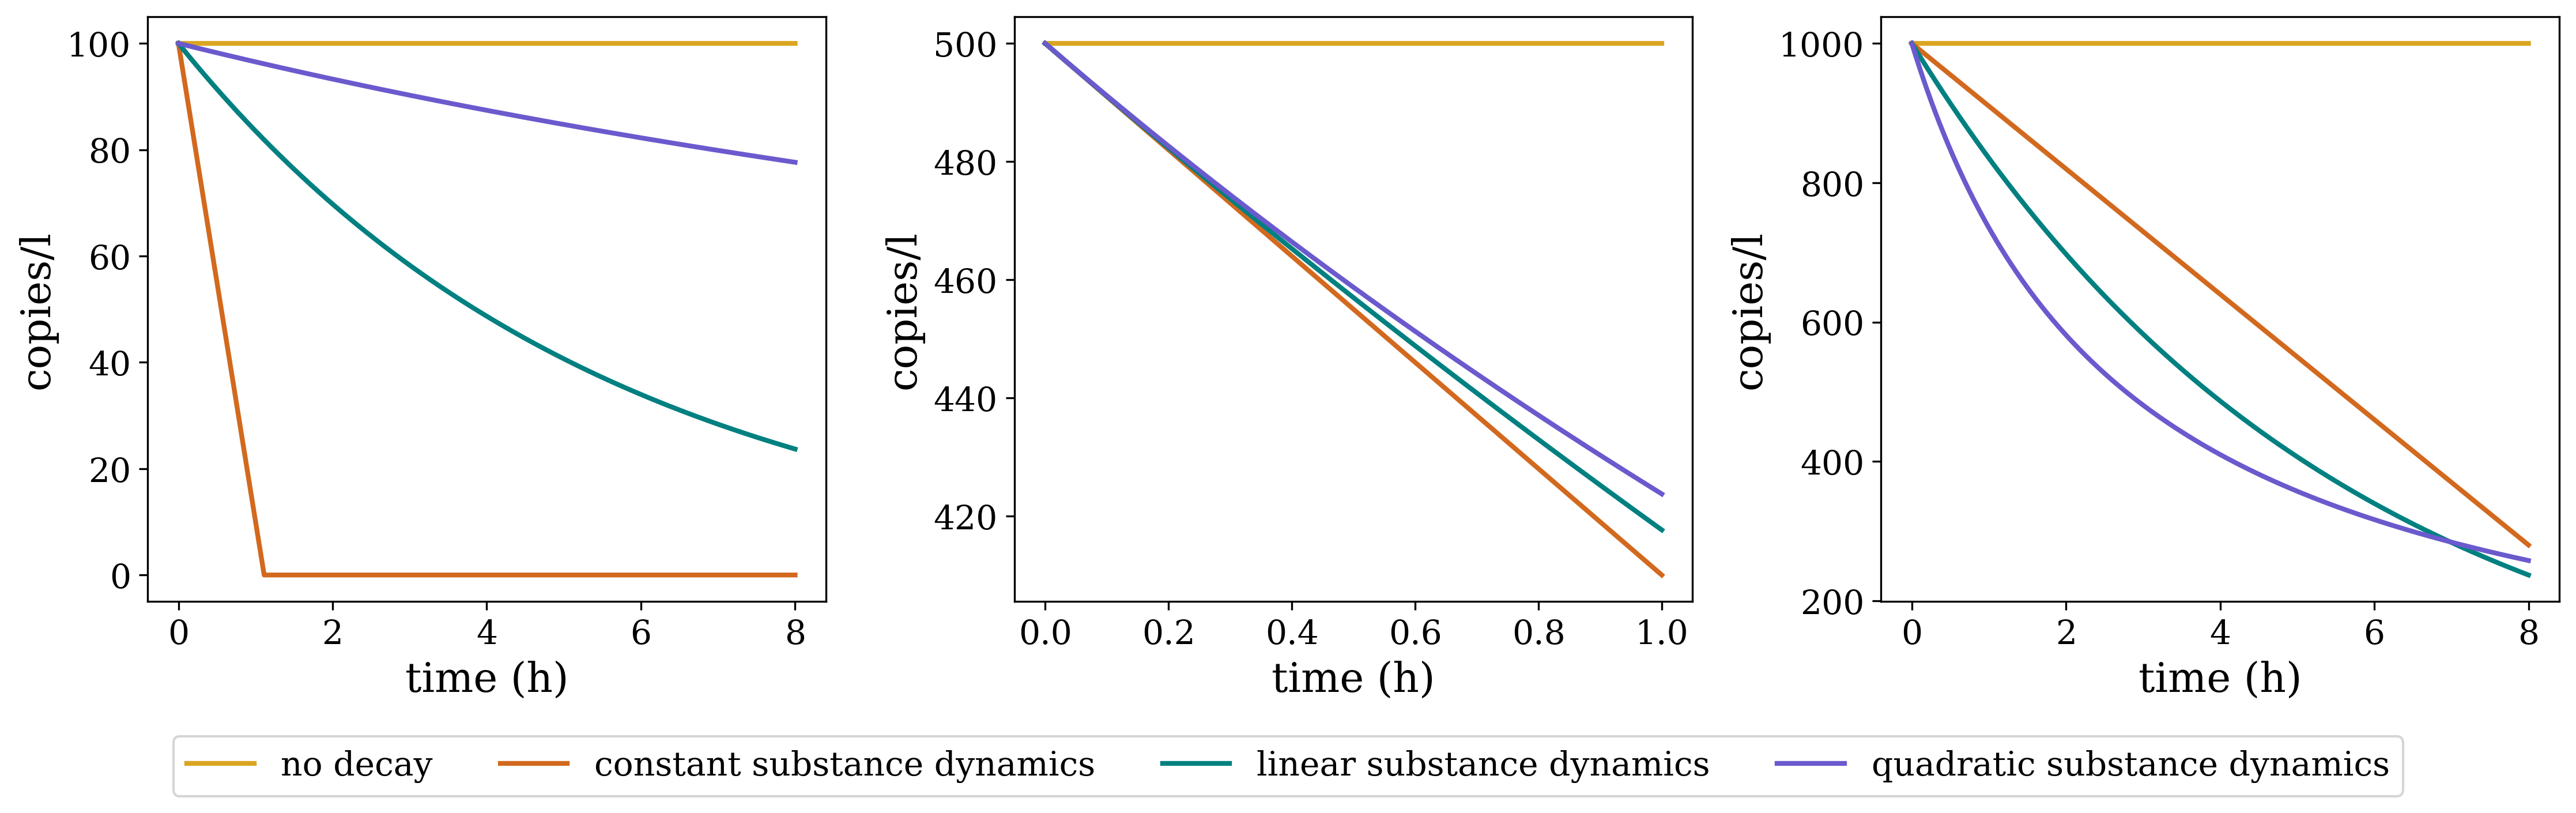

In [50]:
import numpy as np
import matplotlib.pyplot as plt

c = ["goldenrod", "chocolate", "teal", "slateblue"]
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=300, sharey=False, sharex=False)

start_values = [100, 500, 1000]
hours = [8, 1, 8]

for i, ax in enumerate(axs):
    start_value = start_values[i]
    hour = hours[i]
    t_max = hour * 60 * 60
    t_vals = np.arange(0, t_max, 1)
    no_decay = [start_value for t in t_vals]
    constant_decay = [start_value - 2.5 * 10**(-2) * t for t in t_vals]
    constant_decay = [max(0, c) for c in constant_decay]
    linear_decay = [start_value * np.exp(-5 * 10**(-5) * t) for t in t_vals]
    quadratic_decay = [1 / (10**(-7) * t + 1 / start_value) for t in t_vals]

    t_vals = [t / 60 / 60 for t in t_vals]
    ax.plot(t_vals, no_decay, label='no decay', color=c[0], linewidth=2)
    ax.plot(t_vals, constant_decay, label='constant substance dynamics', color=c[1], linewidth=2)
    ax.plot(t_vals, linear_decay, label='linear substance dynamics', color=c[2], linewidth=2)
    ax.plot(t_vals, quadratic_decay, label='quadratic substance dynamics', color=c[3], linewidth=2)
    ax.set_xlabel('time (h)', fontsize=17)
    ax.set_ylabel('copies/l', fontsize=17)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# Create a single legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=14)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Adjust layout to make room for the legend
# plt.show()
plt.savefig(os.path.join("systems_output", "plots", "station_concentration", "reaktionstests", 'overview_decay_dynamics.png'))


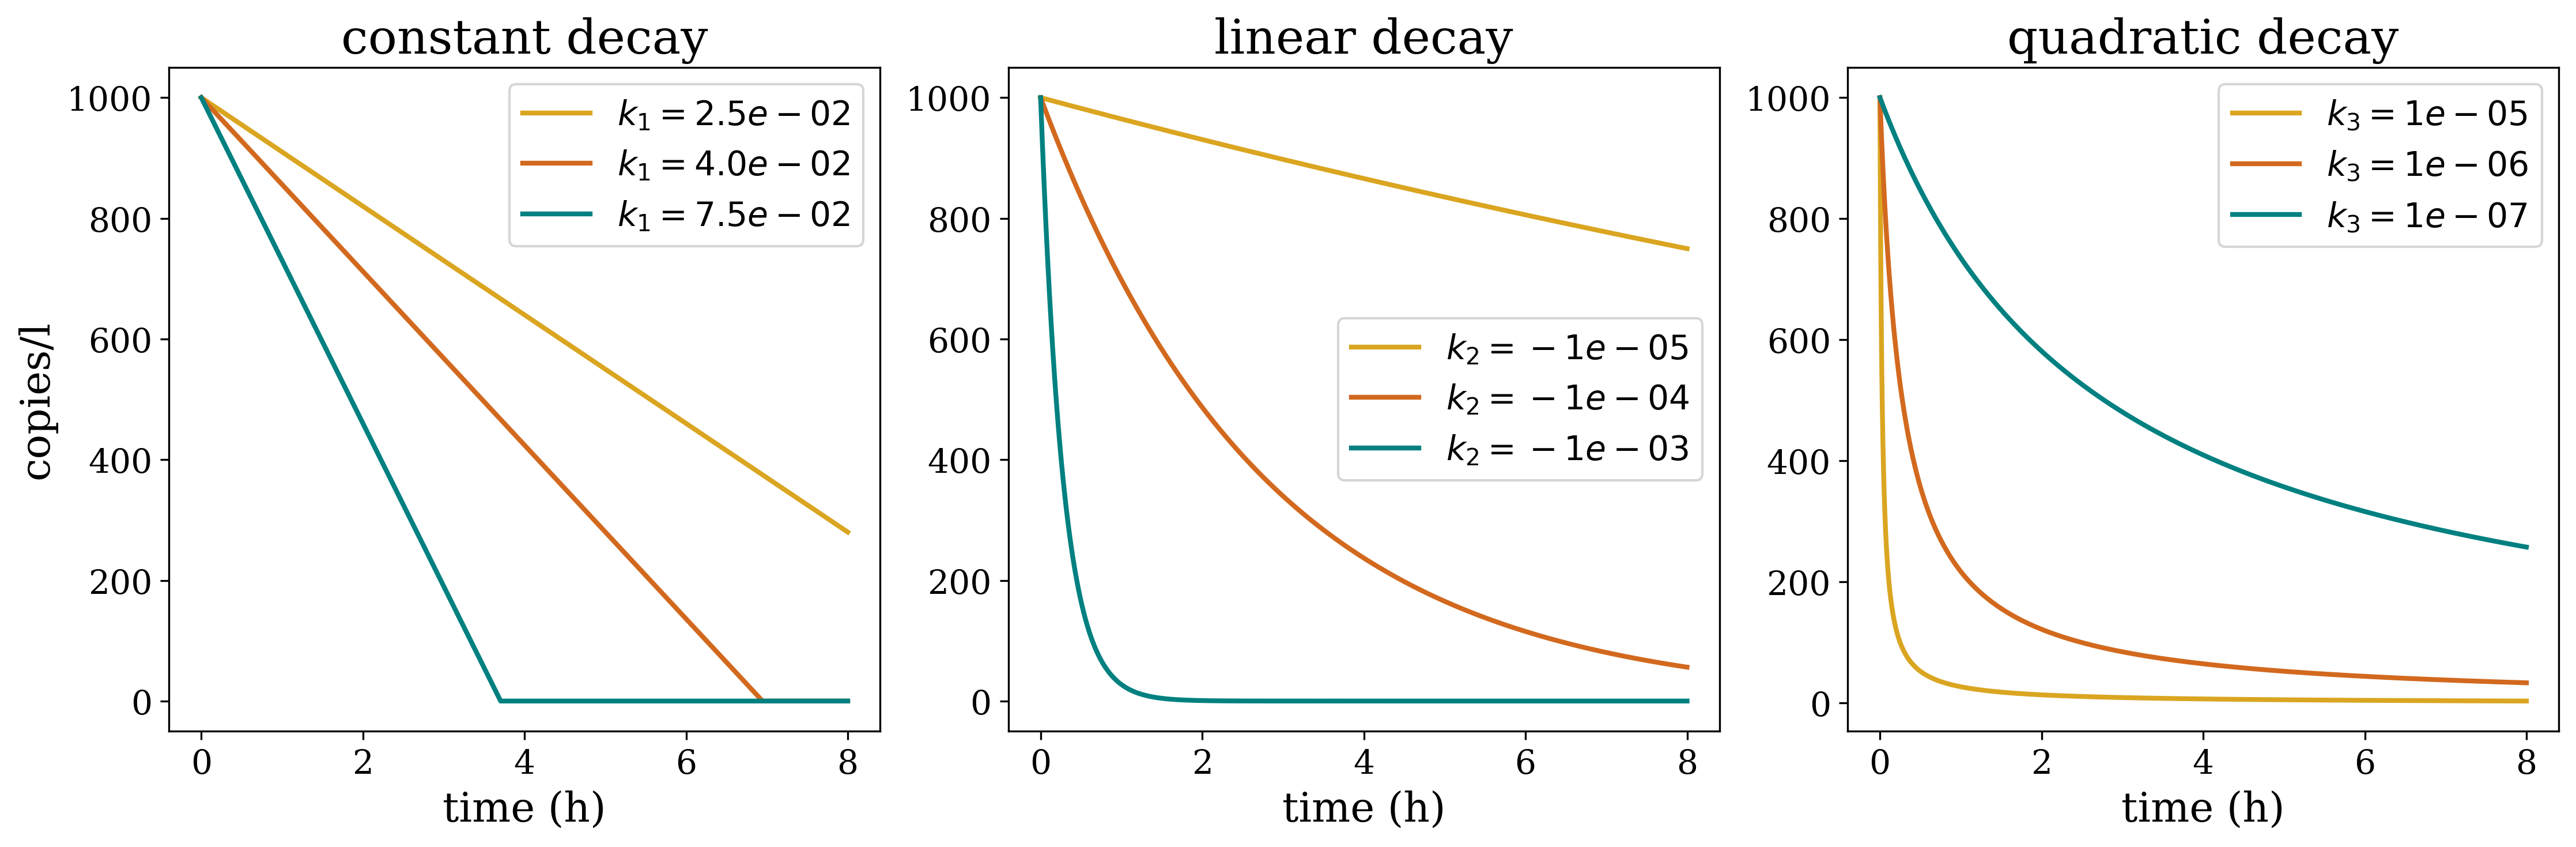

In [51]:
import numpy as np
import matplotlib.pyplot as plt

c = ["goldenrod", "chocolate", "teal", "slateblue"]
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=300, sharey=False, sharex=False)

start_value = 1000
t_vals = np.arange(0, t_max, 1)

constant_pars = [2.5*10**(-2), 4*10**(-2), 7.5*10**(-2)]
constant_decays = [[max(0, start_value - par*t) for t in t_vals] for par in constant_pars]
linear_pars = [-10**(-5), -10**(-4),  -10**(-3)]
linear_decays = [[start_value * np.exp(par * t) for t in t_vals] for par in linear_pars]

quadratic_pars = [10**(-5), 10**(-6), 10**(-7)]
quadratic_decays = [[1 / (par * t + 1 / start_value) for t in t_vals] for par in quadratic_pars]

t_vals = [t/60/60 for t in t_vals]

# constant decay
for i, decay in enumerate(constant_decays):
    axs[0].plot(t_vals, decay, label=f'$k_1 = {constant_pars[i]:.1e}$', color=c[i], linewidth=2)
    axs[0].legend(fontsize=14)
    axs[0].set_title('constant decay', fontsize=20)

# linear decay
for i, decay in enumerate(linear_decays):
    axs[1].plot(t_vals, decay, label=f'$k_2 = {linear_pars[i]:.0e}$', color=c[i], linewidth=2)
    axs[1].legend(fontsize=14)
    axs[1].set_title('linear decay', fontsize=20)

# quadratic
for i, decay in enumerate(quadratic_decays):
    axs[2].plot(t_vals,decay, label=f'$k_3 = {quadratic_pars[i]:.0e}$', color=c[i], linewidth=2)
    axs[2].legend(fontsize=14)
    axs[2].set_title('quadratic decay', fontsize=20)

axs[0].set_ylabel('copies/l', fontsize=17)

for i, ax in enumerate(axs):
    ax.set_xlabel('time (h)', fontsize=17)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)



plt.tight_layout() 
# plt.show()
plt.savefig(os.path.join("systems_output", "plots", "station_concentration", "reaktionstests", 'overview_decay_dynamics_v2.png'))


# Based on results

In [52]:
def load_systems_data(degradation_setting, rain_scenario, file_type="concentrations"):
    if file_type=="concentrations":
        df_res = pd.read_csv(os.path.join("systems_output", "preprocessed", f"{degradation_setting}_{rain_scenario}.csv"))
        df_res = df_res.loc[df_res.minutes>0,:]
    elif file_type=="flow_rates":
        df_res = pd.read_csv(os.path.join("systems_output", "preprocessed", f"flow_rates_{degradation_setting}_{rain_scenario}.csv"))
        df_res.minutes = df_res.minutes - 70 # ensure time consistency with concentrations
        df_res = df_res.loc[df_res.minutes>0,:]
    else:
        assert False, f"file_type {file_type} not supported"

    df_res.time = pd.to_datetime(df_res.time)

    # drop MW064, RW156 (invalid calculations of ++systems)
    df_res = df_res.loc[~df_res.sampling_point.isin(["MW064", "RW156"]), :]
    # rename sampling locations according to naming in the paper
    df_res.sampling_point = df_res.sampling_point.map({"MW022": "1", "MW023": "2", "MW017": "3", "MW043": "4", "MW048": "5", 
                        "RW157": "6", "MW046": "7", "MW061": "8", "RW143": "9", "RW141": "10",
                        "RW155": "11", "MW059": "12", "RW211": "13", "MW054": "14",
                        "RW126": "15", "MW052": "16"})
    return df_res

In [53]:
# 
rain_scenario = "KeinRegen"
df_no_decay = load_systems_data("no_degradation", rain_scenario, file_type="concentrations")
df_linear_decay = load_systems_data("linear_degradation", rain_scenario, file_type="concentrations")
df_constant_decay = load_systems_data("constant_degradation", rain_scenario, file_type="concentrations")
df_quadratic_decay = load_systems_data("quadratic_degradation", rain_scenario, file_type="concentrations")


/tmp/ipykernel_11910/1107511700.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_11910/1107511700.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_11910/1107511700.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_11910/1107511700.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])


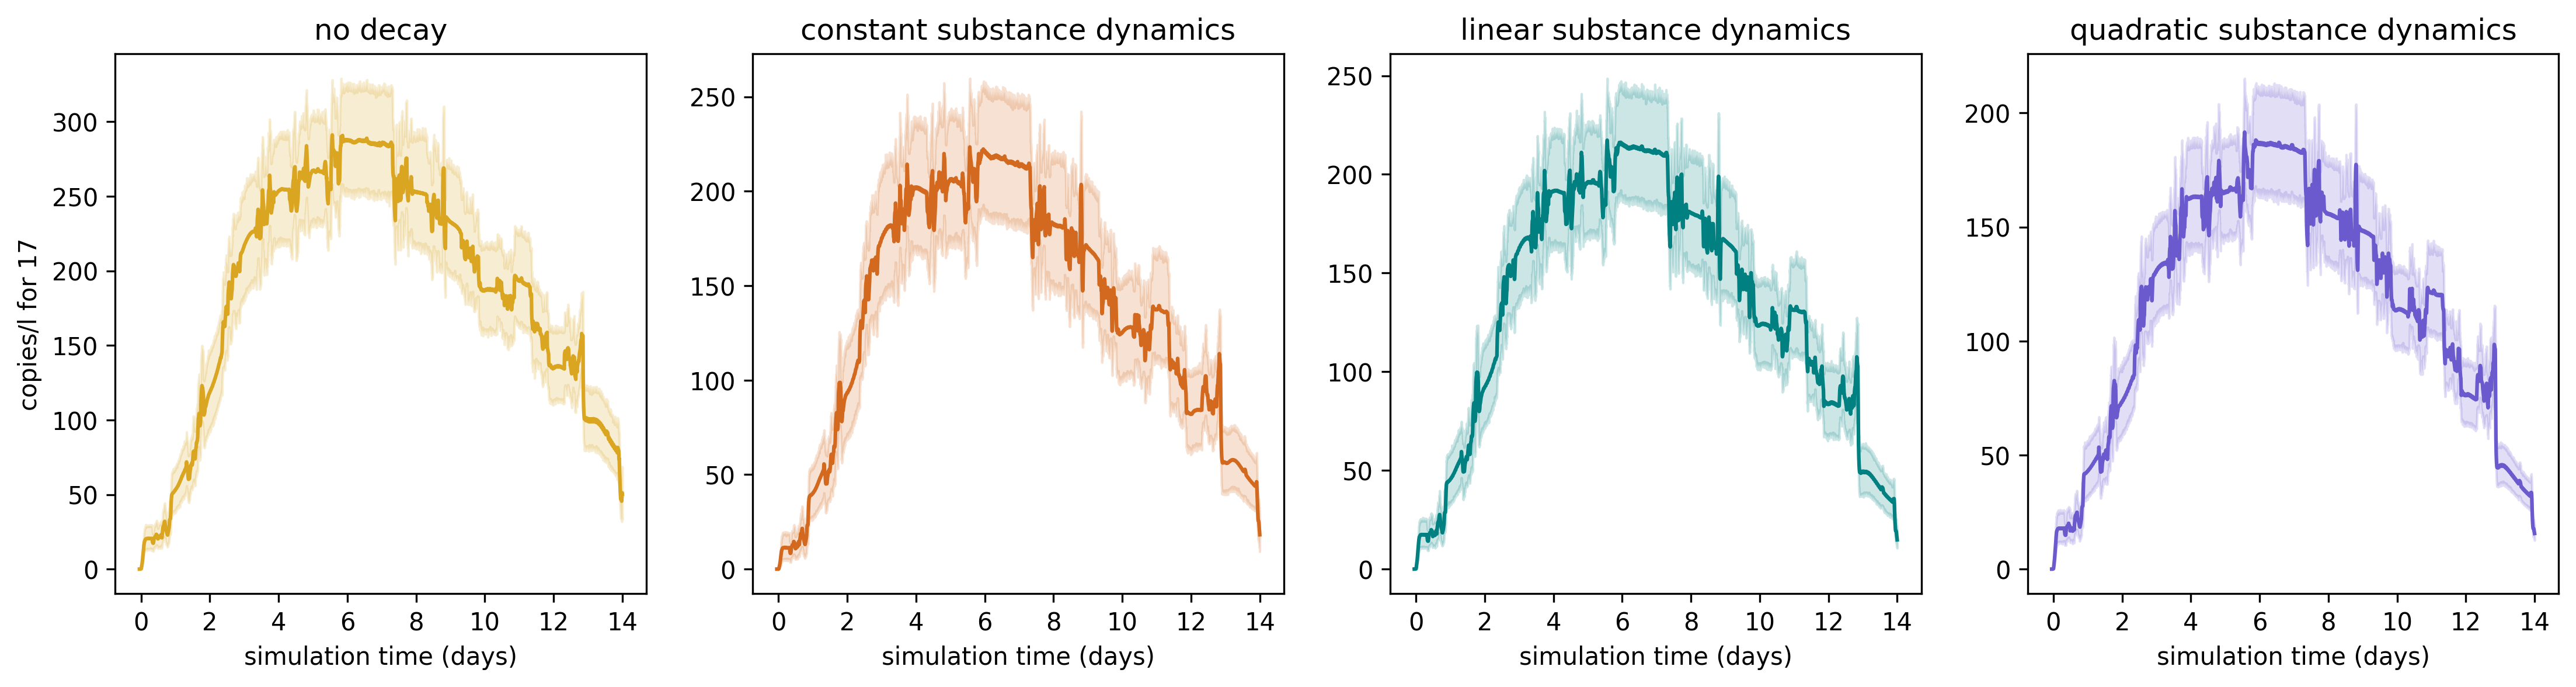

In [58]:
date_form = DateFormatter("%-d")

station = "17"

fig, axs = plt.subplots(ncols=4, sharey=False, figsize=(18, 4), dpi=300)
for i, (variate, variate_title) in enumerate(zip([df_no_decay, df_constant_decay, df_linear_decay, df_quadratic_decay], ["no decay", "constant substance dynamics", "linear substance dynamics", "quadratic substance dynamics"])):
    sns.lineplot(data=variate.loc[variate.sampling_point==station,:], x="time", y="copies/l", ax=axs[i], color=["goldenrod", "chocolate", "teal", "slateblue"][i])
    axs[i].set_title(f"{variate_title}")    
    axs[i].xaxis.set_major_formatter(date_form) 
    axs[i].set_xlabel(f"simulation time (days)")
    if i != 0:
        axs[i].set_ylabel("")
    axs[i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])

axs[0].set_ylabel(f"copies/l for {station}")
fig.savefig(os.path.join("systems_output", "plots", "station_concentration", "reaktionstests", f"next_to_each_other_{rain_scenario}_{station}.png"))

In [66]:
fig.savefig(os.path.join("systems_output", "plots", "station_concentration", "reaktionstests", f"next_to_each_other_{rain_scenario}_{station}.png"))

KeyboardInterrupt: 

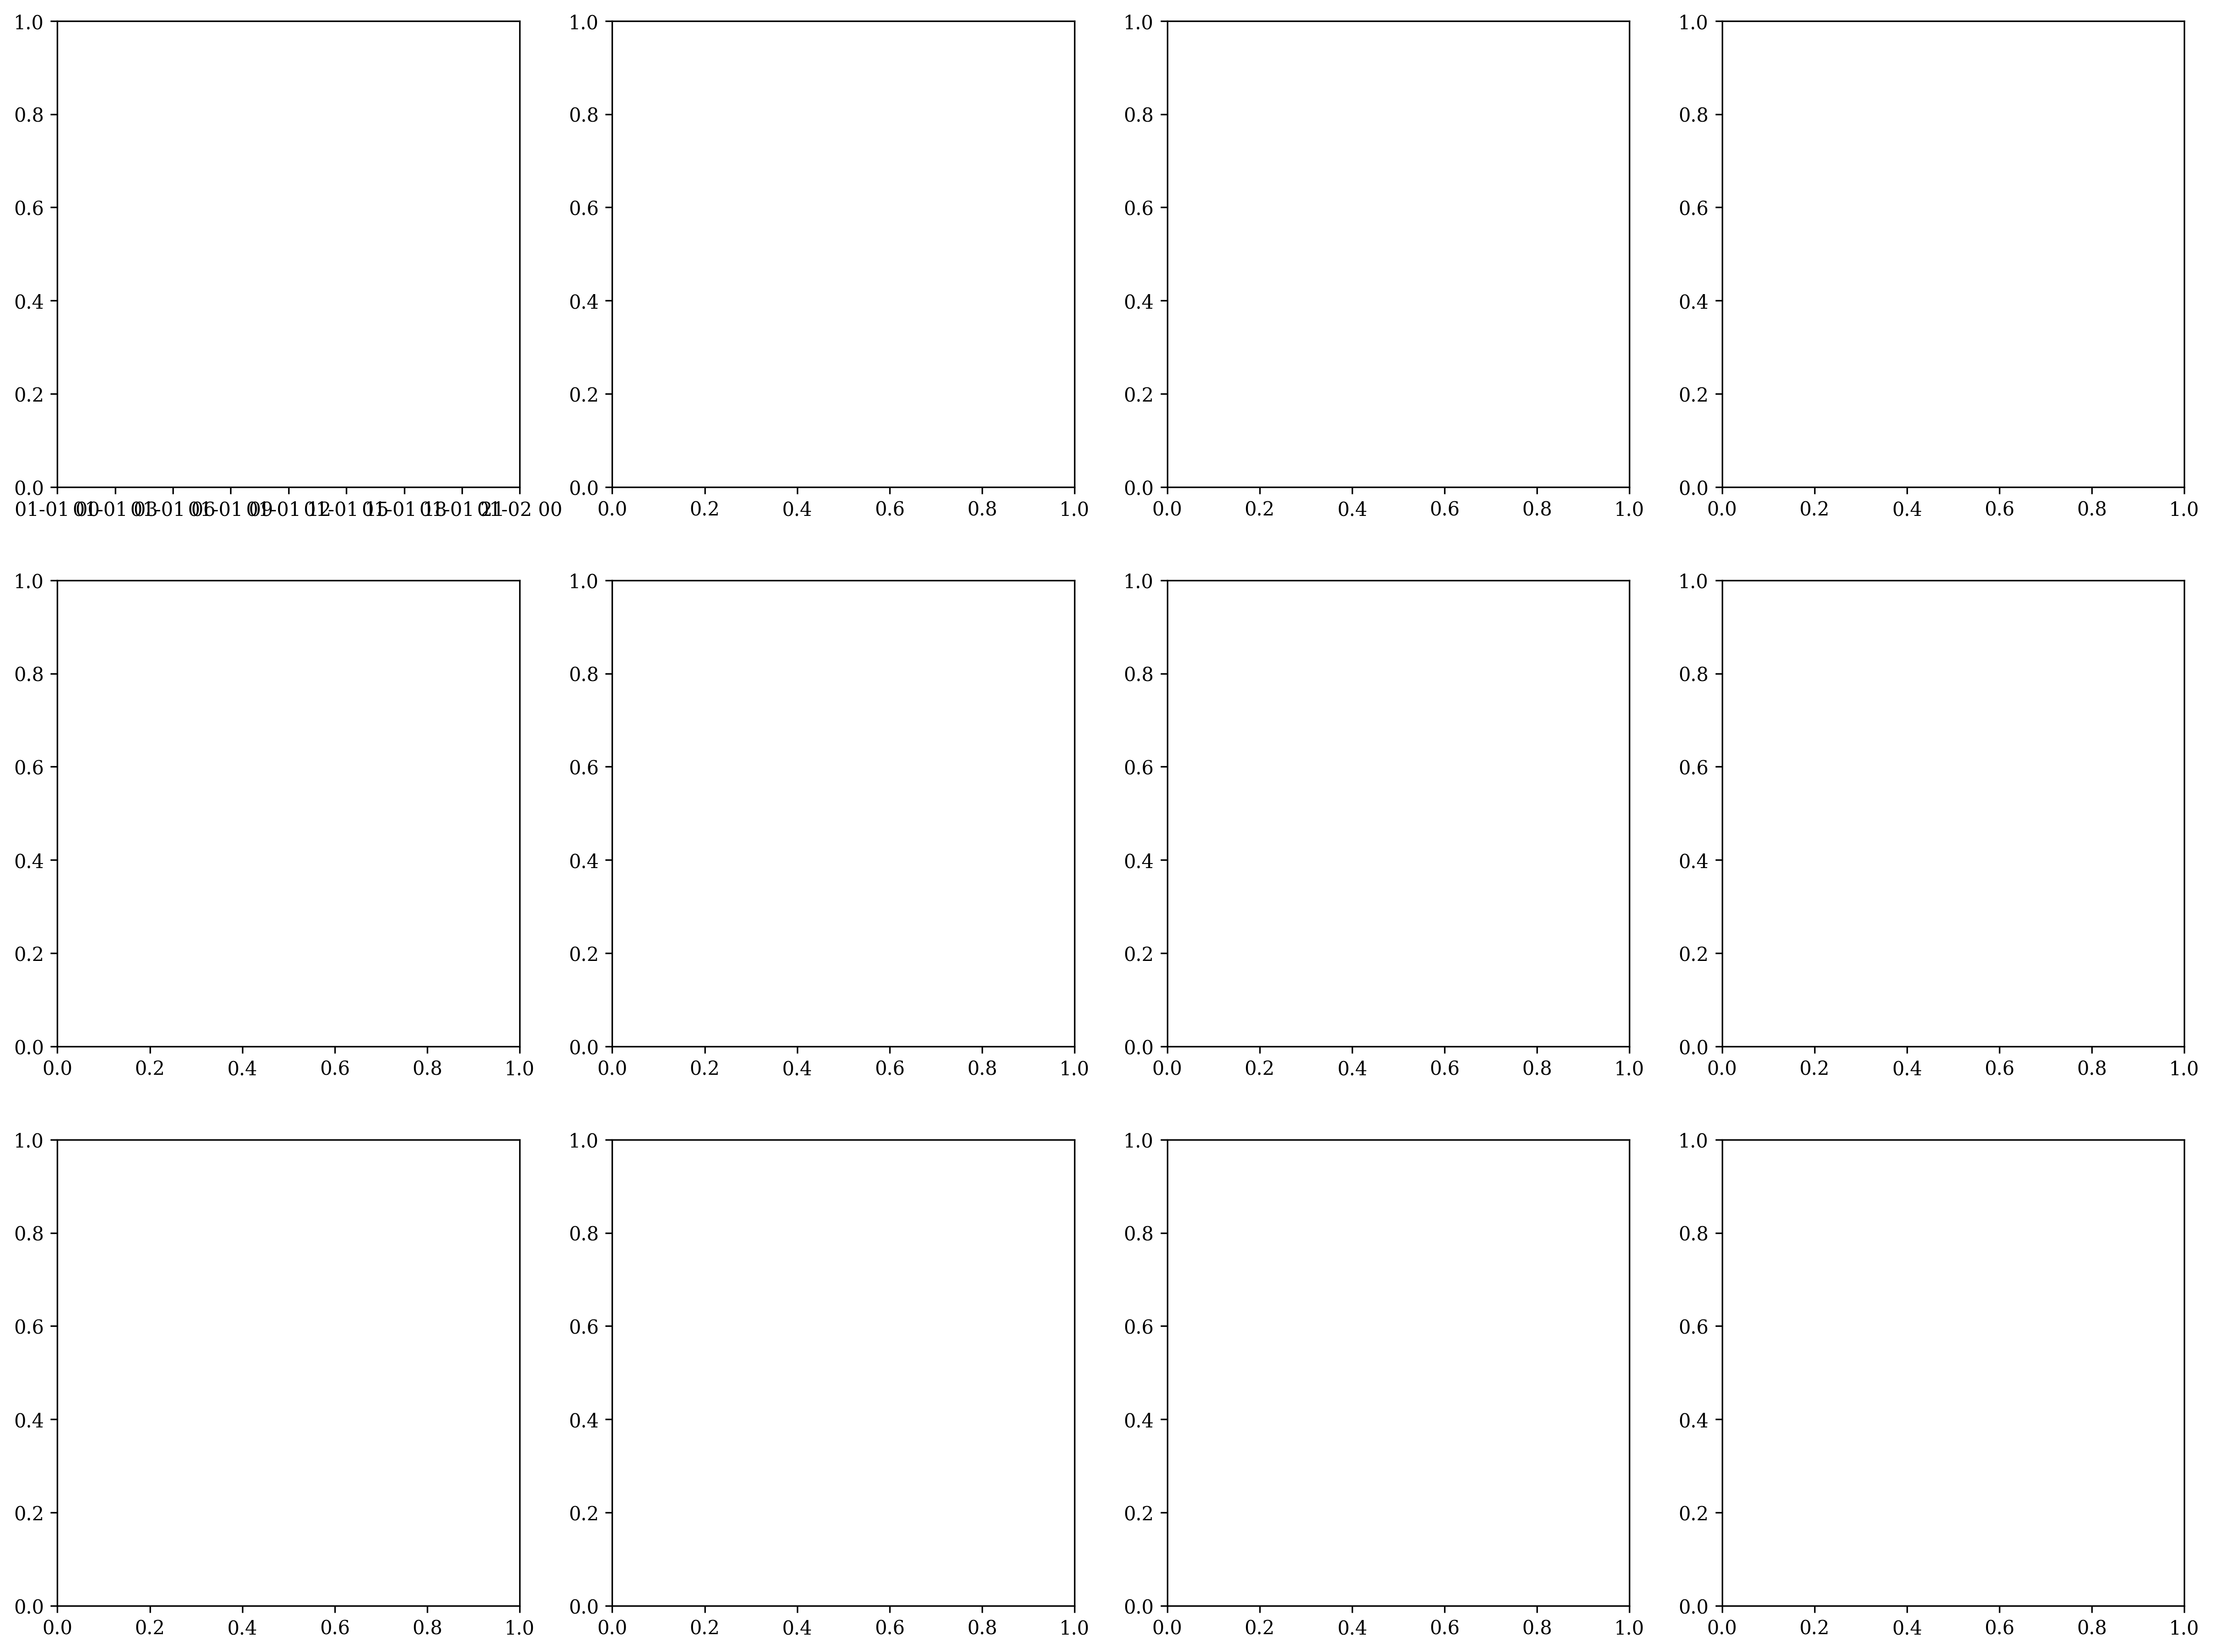

In [54]:
date_form = DateFormatter("%-d")

stations = ["1", "8", "16"]
# stations = ["1", "8", "16"]

fig, axs = plt.subplots(nrows=3, ncols=4, sharey=False, figsize=(20, 15), dpi=300)
for j, station in enumerate(stations):
    for i, (variate, variate_title) in enumerate(zip([df_no_decay, df_constant_decay, df_linear_decay, df_quadratic_decay], ["no decay", "constant substance dynamics", "linear substance dynamics", "quadratic substance dynamics"])):
        sns.lineplot(data=variate.loc[variate.sampling_point==station,:], x="time", y="copies/l", ax=axs[j,i], color=["goldenrod", "chocolate", "teal", "slateblue"][i])
        if j==0:
            axs[j,i].set_title(f"{variate_title}", fontsize=20)
        axs[j,i].xaxis.set_major_formatter(date_form) 
        
        if i != 0:
            axs[j,i].set_ylabel("")
        axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])

        if j==2:
            axs[j,i].set_xlabel(f"simulation time (days)", fontsize=17)
        else:
            axs[j,i].set_xlabel("")

    axs[j,0].set_ylabel(f"copies/l for station {station}", fontsize=17)

plt.tight_layout()
fig.savefig(os.path.join("systems_output", "plots", "station_concentration", "reaktionstests", f"next_to_each_other_{rain_scenario}_{stations[0]}_{stations[1]}_{stations[2]}.png"))

/tmp/ipykernel_74903/4263126344.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_74903/4263126344.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_74903/4263126344.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_74903/4263126344.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])
/tmp/ipykernel_74903/4263126344.py:21: UserW

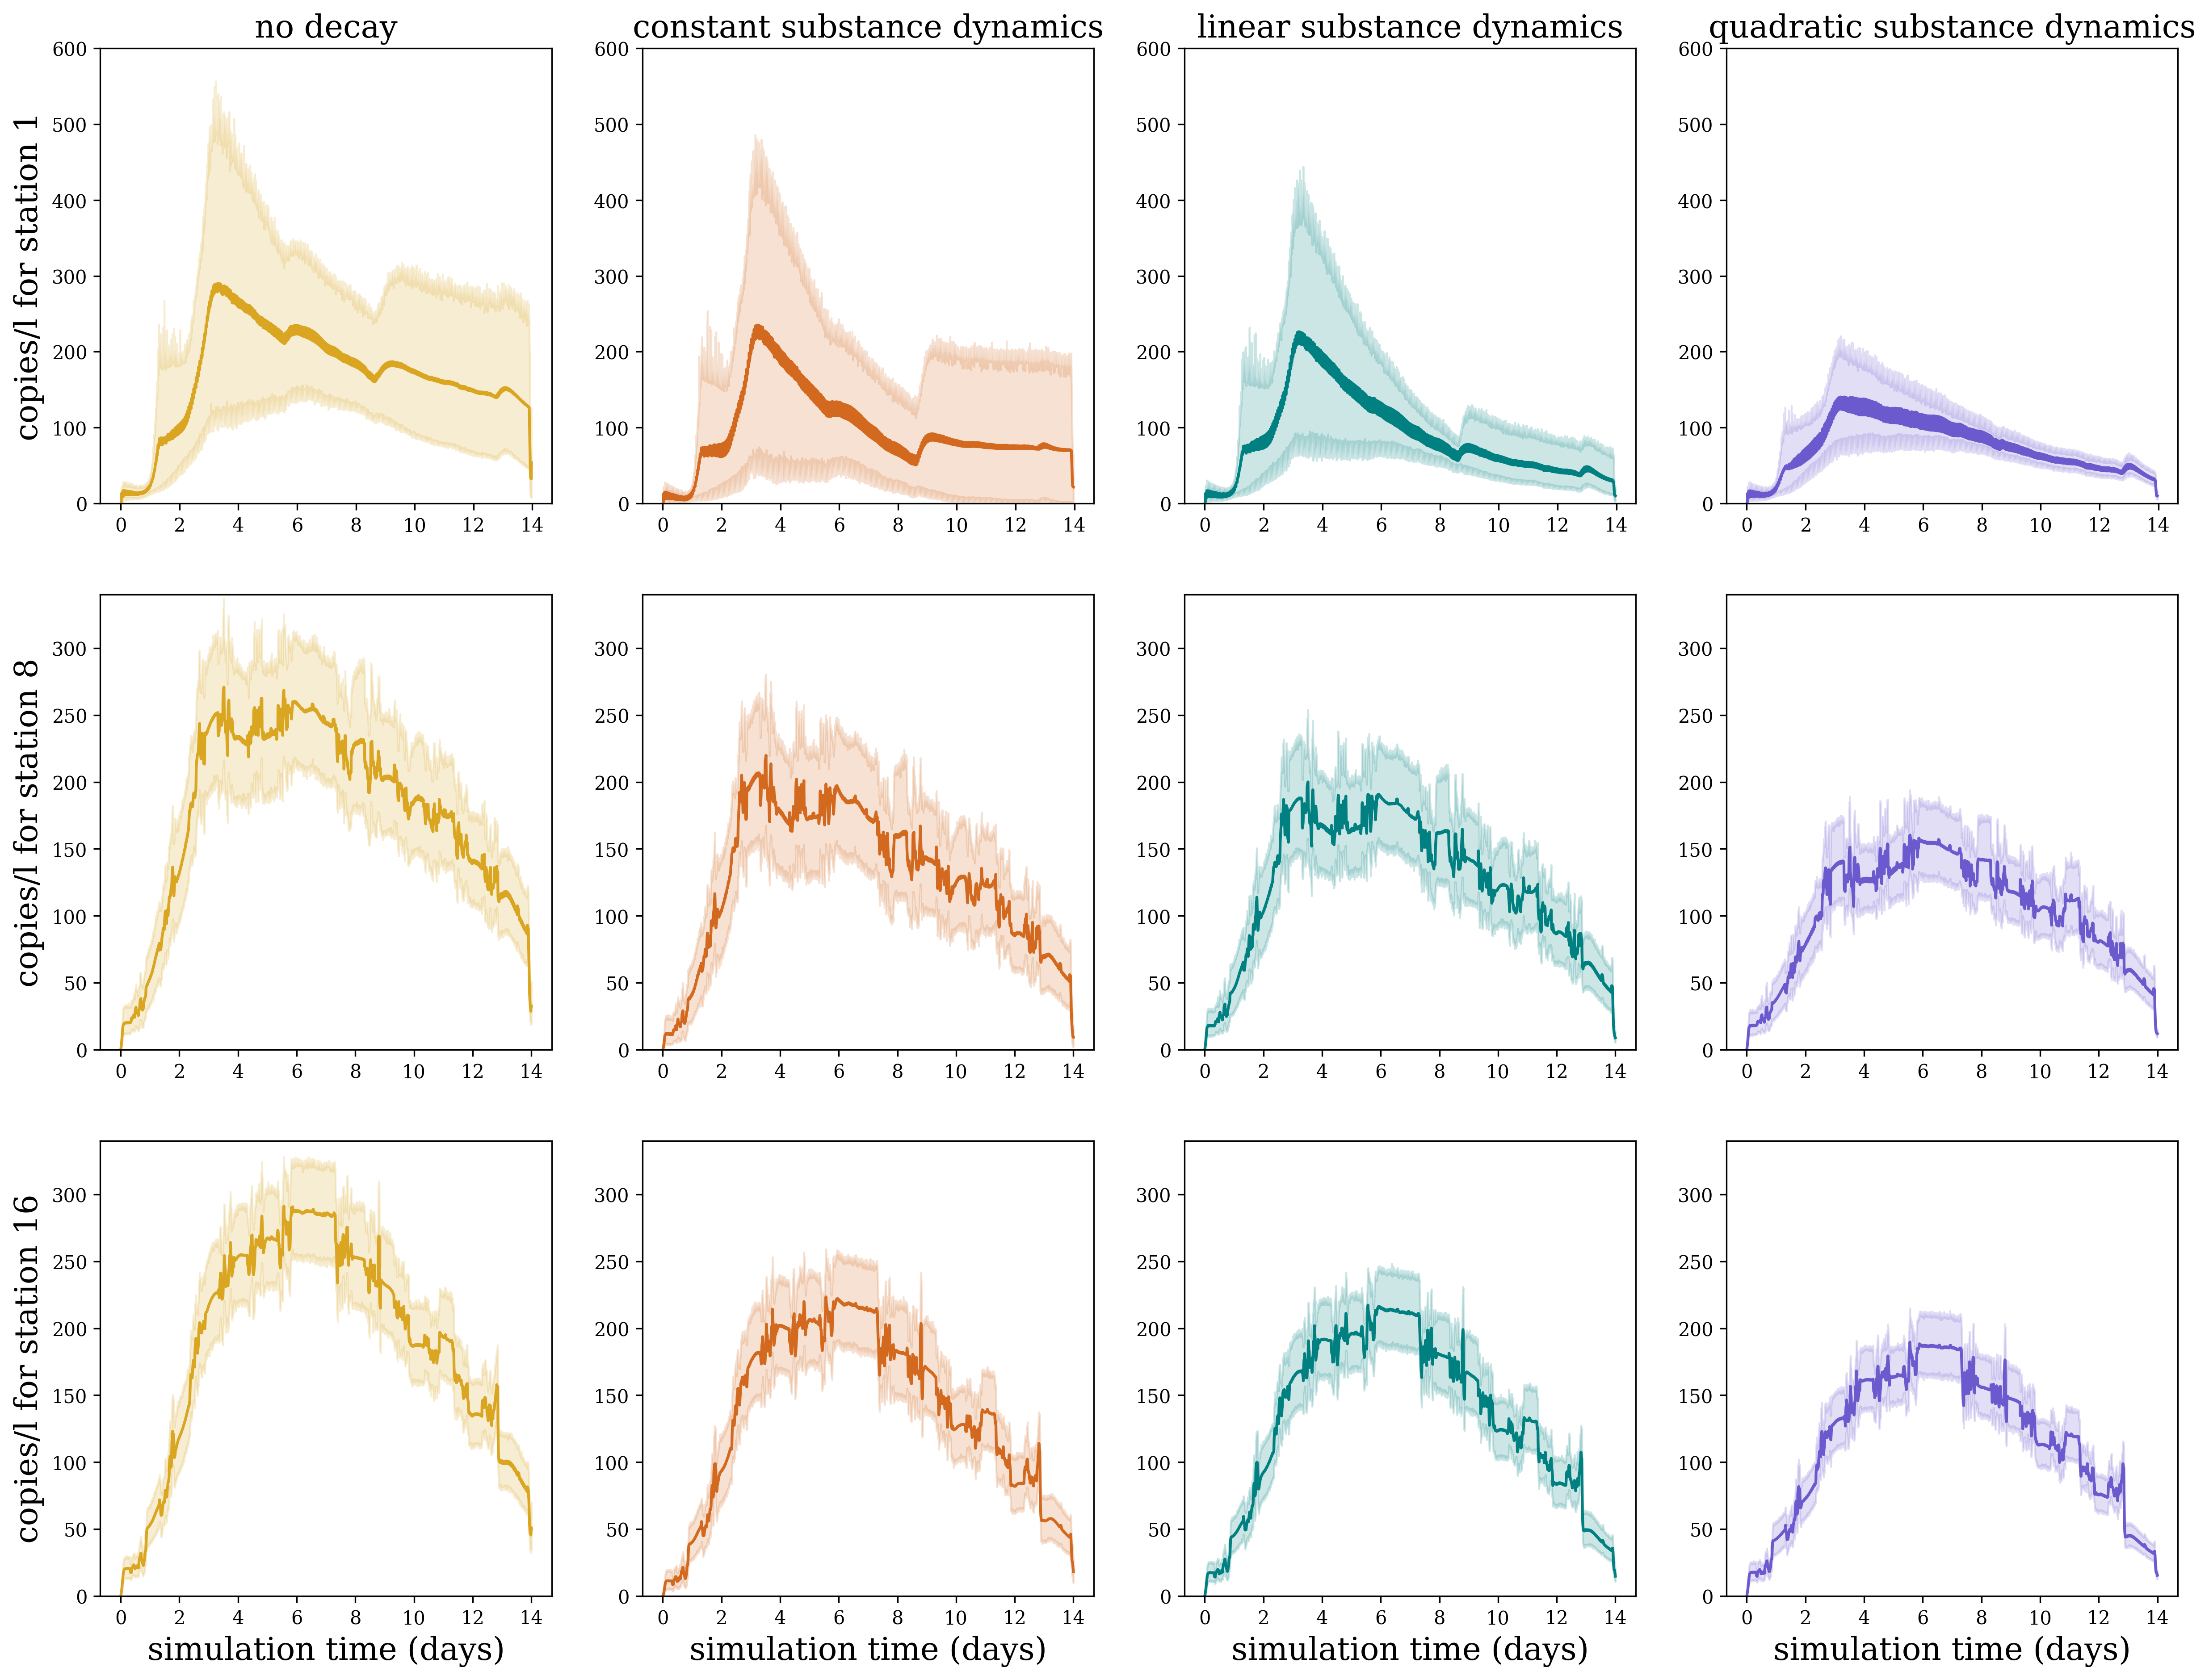

In [56]:
date_form = DateFormatter("%-d")

# stations = ["2", "8", "17"]
stations = ["1", "8", "16"]

# Define y-axis limits for each row
# y_limits = [(0, 9000), (0, 350), (0, 320)]  # for stations 2, 8, 17
y_limits = [(0, 600), (0, 340), (0, 340)]  # for stations 1, 8, 17


fig, axs = plt.subplots(nrows=3, ncols=4, sharey=False, figsize=(20, 15), dpi=300)
for j, station in enumerate(stations):
    for i, (variate, variate_title) in enumerate(zip([df_no_decay, df_constant_decay, df_linear_decay, df_quadratic_decay], ["no decay", "constant dynamics", "linear dynamics", "quadratic dynamics"])):
        sns.lineplot(data=variate.loc[variate.sampling_point==station,:], x="time", y="copies/l", ax=axs[j,i], color=["goldenrod", "chocolate", "teal", "slateblue"][i])
        if j==0:
            axs[j,i].set_title(f"{variate_title}", fontsize=17)    
        axs[j,i].xaxis.set_major_formatter(date_form) 
        
        if i != 0:
            axs[j,i].set_ylabel("")
        axs[j,i].set_xticklabels(["0", "2", "4", "6", "8", "10", "12", "14"])

        if j==2:
            axs[j,i].set_xlabel(f"simulation time (days)", fontsize=17)
        else:
            axs[j,i].set_xlabel("")

    axs[j,0].set_ylabel(f"copies/l for station {station}", fontsize=17)
    axs[j, 0].set_ylim(y_limits[j])  # Set y-axis limit for the first column of each row
    for k in range(1, 4):
        axs[j, k].set_ylim(y_limits[j]) 

for i in range(4):
    for j in range(3):
        axs[j,i].tick_params(axis='x', labelsize=14)
        axs[j,i].tick_params(axis='y', labelsize=14)

plt.tight_layout()

fig.savefig(os.path.join("systems_output", "plots", "station_concentration", "reaktionstests", f"next_to_each_other_{rain_scenario}_{stations[0]}_{stations[1]}_{stations[2]}_shared_y.png"))


In [70]:
fig.savefig(os.path.join("systems_output", "plots", "station_concentration", "reaktionstests", f"next_to_each_other_{rain_scenario}_{stations[0]}_{stations[1]}_{stations[2]}_shared_y.png"))
